## Cách hoạt động

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [47]:
## khởi tạo các centers ban đầu
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace = False)]

In [48]:
X =np.array([[1, 67], [23, 86], [1, 2], [2, 2], [1, 16], [2, 3], [3,4], [5,1], [3,9], [12, 4], [0, 3], [8, 4], [5, 17], [23, 9], [66, 7], [45, 3], [18, 9], [34, 23], [24, 56], [90, 15], [73, 51], [84, 6], [9, 56], [7, 29], [1, 68], [0, 0], [45, 9], [23, 1], [5, 5], [15, 9], [200, 4], [19, 2], [83, 100]])

In [49]:
centers = kmeans_init_centers(X, 3)
print(centers)

[[ 1 68]
 [ 1  2]
 [ 9 56]]


In [50]:
# gán nhãn mới cho các điểm khi biết centers
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [51]:
kmeans_assign_labels(X, centers)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2])

In [52]:
# cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1])) ### X.shape[1]: số cột của X, X.shape[0]: số dòng của X
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of center are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
    

In [53]:
# k-means
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it +=1
    return (centers, labels, it)

In [55]:
(centers, labels, it) = kmeans(X, 3)
print(centers[-1])

[[ 12.54545455   7.45454545]
 [102.6         16.6       ]
 [ 23.5         72.16666667]]


In [58]:
# kiểm tra
from __future__ import print_function 
from scipy.spatial.distance import cdist
np.random.seed(11)

In [59]:
# tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn 
# mcó kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), 
# ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm.

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0) #
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

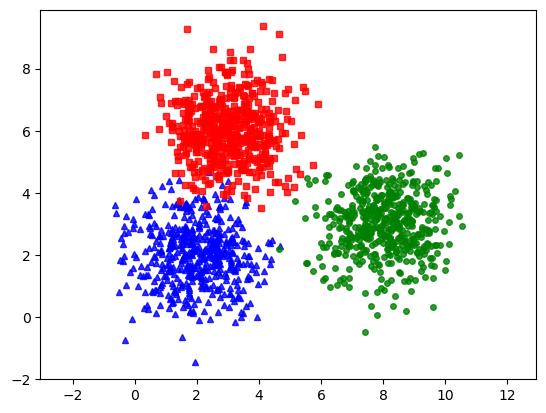

In [60]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [65]:
(centers, labels, it) = kmeans(X, 3)
print(centers[-1])

[[1.97563391 2.01568065]
 [8.0410628  3.02094748]
 [2.99634182 6.03964618]]


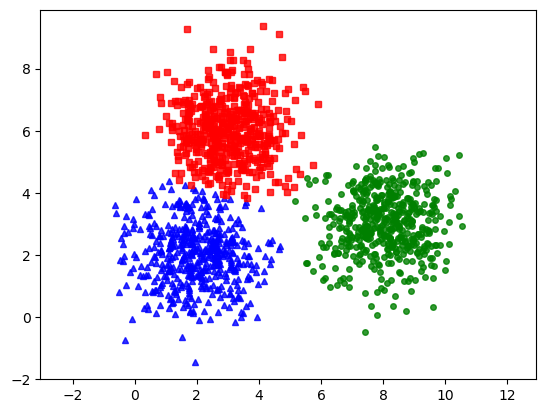

In [67]:
kmeans_display(X, labels[-1])

## Sử dụng thư viện scikit-learn

Centers find bt scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


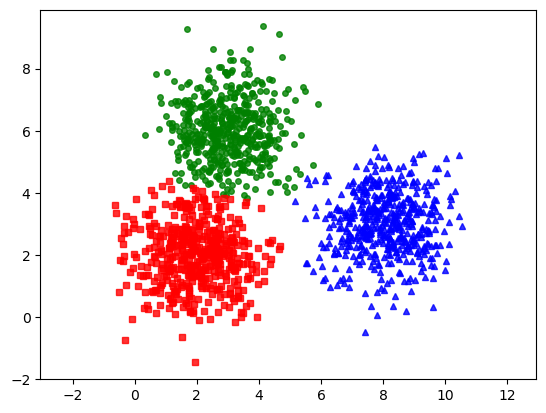

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
print('Centers find bt scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Hạn chế 

###  1. Cần biết số lượng cluster cần clustering

Có một số phương pháp giúp xác định số lượng clusters: ***Elbow method - Determining the number of clusters in a data set.***

### 2. Nghiệm cuối cùng phụ thuộc vào các centers được khởi tạo ban đầu

**Có một vài cách khắc phục đó là:**
* Chạy K-means clustering nhiều lần với các center ban đầu khác nhau rồi chọn cách có hàm mất mát cuối cùng đạt giá trị nhỏ nhất.


* [K-means++ -Improve initialization algorithm - wiki.](https://en.wikipedia.org/wiki/K-means%2B%2B#Improved_initialization_algorithm)


* Bạn nào muốn tìm hiểu sâu hơn có thể xem bài báo khoa học [Cluster center initialization algorithm for K-means clustering.](https://www.sciencedirect.com/science/article/abs/pii/S0167865504000996)

### 3. Các cluster cần có só lượng điểm gần bằng nhau

### 4. Các cluster cần có dạng hình tròn
- Tức các cluster tuân theo phân phối chuẩn và ma trận hiệp phương sai là ma trận đường chéo có các điểm trên đường chéo giống nhau.

### 5. khi một cluster nằm phía trong một cluster khác

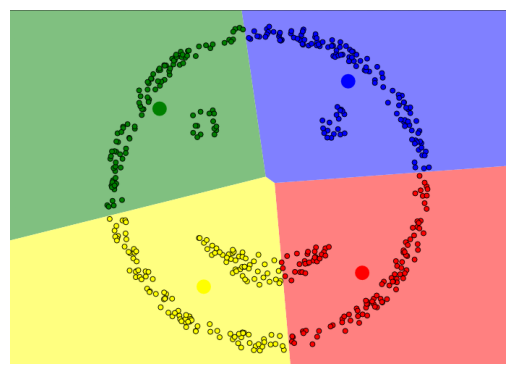

In [76]:
import matplotlib.image as mpimg
# Đường dẫn đến tệp ảnh trên máy của bạn
image_path = "smile_face.png"
# Đọc ảnh từ đường dẫn
image = mpimg.imread(image_path)
# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')  # Tắt các trục
plt.show()

* Đây là ví dụ kinh điển về việc K-means clustering không thể phân cụm dữ liệu. Một cách tự nhiên, chúng ta sẽ phân ra thành 4 cụm: mắt trái, mắt phải, miệng, xung quanh mặt. Nhưng vì mắt và miệng nằm trong khuôn mặt nên K-means clustering không thực hiện được:

